# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript
david,"In this 2023 comedy special, David Nihill humo..."
gabriel,[man] Can you please state your name? Martin M...
george,George Carlin: I’m Glad I’m Dead (2024) is a c...
jon,"In an interview conducted by Jon Stewart, Geor..."
kate,"Whoa! Okay, yeah. Good. Okay, don’t embarrass ..."
kevin,Kevin James: Irregardless (2024) In Kevin Jame...
leanne,Leanne Morgan: I’m Every Woman (2023) In “I’m ...
lewis,"Lewis Black: Tragically, I Need You (2023) is ..."
louis,“Louis C.K.: At The Dolby” is Louis C.K.’s thi...
matt,"In his second hour-long comedy special, “Matth..."


### Polarity refers to the emotion or sentiment expressed in a piece of text
- -1 indicates a very negative sentiment
- 0 indicates a neutral sentiment
- 1 indicates a very positive sentiment

### Subjectivity measures how much of the text is based on the writer's personal perspective rather than being purely factual.
- 0 indicates little to no opinion.
- 1 indicates opinions, feelings, or personal beliefs.



In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,polarity,subjectivity
david,"In this 2023 comedy special, David Nihill humo...",0.107164,0.439066
gabriel,[man] Can you please state your name? Martin M...,0.114206,0.475875
george,George Carlin: I’m Glad I’m Dead (2024) is a c...,0.055917,0.487264
jon,"In an interview conducted by Jon Stewart, Geor...",0.178490,0.556977
kate,"Whoa! Okay, yeah. Good. Okay, don’t embarrass ...",0.198386,0.523569
kevin,Kevin James: Irregardless (2024) In Kevin Jame...,0.100339,0.483369
leanne,Leanne Morgan: I’m Every Woman (2023) In “I’m ...,0.119390,0.491975
lewis,"Lewis Black: Tragically, I Need You (2023) is ...",-0.009595,0.541740
louis,“Louis C.K.: At The Dolby” is Louis C.K.’s thi...,0.051602,0.524177
matt,"In his second hour-long comedy special, “Matth...",0.093767,0.524000


In [3]:
# Let's add the comedians' full names as well
full_names = [
    'Jon Stewart',
    'Kevin Hart',
    'Pete Davidson',
    'Matt Damon',  
    'David Letterman',
    'Shane Gillis',
    'Lewis Black',
    'Stavros Halkias',
    'George Carlin',
    'Leanne Morgan',
    'Louis C.K.',
    'Roseanne Barr',
    'Sammy Davis Jr.',  
    'Gabriel Iglesias',
    'Kate McKinnon'
]
data['full_name'] = full_names
data

,transcript,polarity,subjectivity,full_name
david,"In this 2023 comedy special, David Nihill humo...",0.107164,0.439066,Jon Stewart
gabriel,[man] Can you please state your name? Martin M...,0.114206,0.475875,Kevin Hart
george,George Carlin: I’m Glad I’m Dead (2024) is a c...,0.055917,0.487264,Pete Davidson
jon,"In an interview conducted by Jon Stewart, Geor...",0.178490,0.556977,Matt Damon
kate,"Whoa! Okay, yeah. Good. Okay, don’t embarrass ...",0.198386,0.523569,David Letterman
kevin,Kevin James: Irregardless (2024) In Kevin Jame...,0.100339,0.483369,Shane Gillis
leanne,Leanne Morgan: I’m Every Woman (2023) In “I’m ...,0.119390,0.491975,Lewis Black
lewis,"Lewis Black: Tragically, I Need You (2023) is ...",-0.009595,0.541740,Stavros Halkias
louis,“Louis C.K.: At The Dolby” is Louis C.K.’s thi...,0.051602,0.524177,George Carlin
matt,"In his second hour-long comedy special, “Matth...",0.093767,0.524000,Leanne Morgan


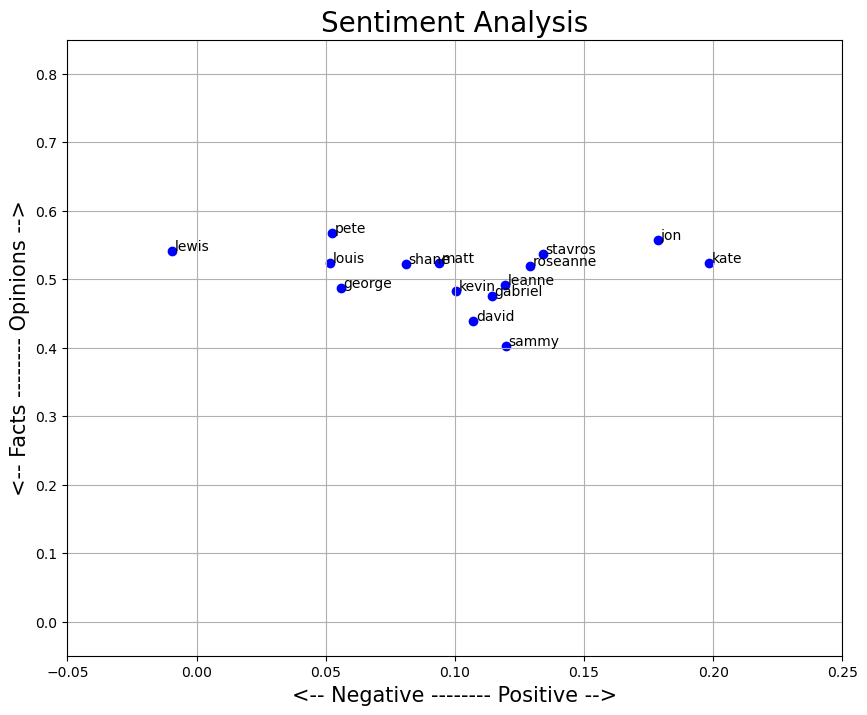

In [30]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x + .001, y + .001, data.index[index], fontsize=10)  # Use the index as comedian name

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

# Adjust limits to include all points
plt.xlim(-0.05, 0.25)
plt.ylim(-0.05, 0.85)

plt.grid(True)  # Add grid lines for better visualization

plt.show()


- closer to the right side of the plot have more positive sentiment ->  KATE & JON
- closer to the left side have more negative sentiment. -> LEWIS
- Points higher on the plot indicate routines with more opinionated content->PETE
- points lower represent routines with more factual content-> SAMMY & DAVID

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [31]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
# Let's take a look at our data again
data

,transcript,polarity,subjectivity,full_name
david,"In this 2023 comedy special, David Nihill humo...",0.107164,0.439066,Jon Stewart
gabriel,[man] Can you please state your name? Martin M...,0.114206,0.475875,Kevin Hart
george,George Carlin: I’m Glad I’m Dead (2024) is a c...,0.055917,0.487264,Pete Davidson
jon,"In an interview conducted by Jon Stewart, Geor...",0.178490,0.556977,Matt Damon
kate,"Whoa! Okay, yeah. Good. Okay, don’t embarrass ...",0.198386,0.523569,David Letterman
kevin,Kevin James: Irregardless (2024) In Kevin Jame...,0.100339,0.483369,Shane Gillis
leanne,Leanne Morgan: I’m Every Woman (2023) In “I’m ...,0.119390,0.491975,Lewis Black
lewis,"Lewis Black: Tragically, I Need You (2023) is ...",-0.009595,0.541740,Stavros Halkias
louis,“Louis C.K.: At The Dolby” is Louis C.K.’s thi...,0.051602,0.524177,George Carlin
matt,"In his second hour-long comedy special, “Matth...",0.093767,0.524000,Leanne Morgan


In [7]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['In this 2023 comedy special, David Nihill humorously navigates the complexities of identity, cultural norms, and immigration. The routine starts with an amusing encounter at an immigration checkpoint, highlighting Nihill’s Irish heritage and the officer’s misplaced connection to it. Nihill then adopts a Latino identity as a comedic device to critique automated customer service systems. He cleverly connects Irish and Latino cultures, drawing parallels in their experiences, particularly around issues like immigration and religion, using humor to highlight these similarities. Nihill also addresses the evolving perception of Irish immigrants in America, blending history with humor. He reflects on the Irish journey from being a marginalized group to gaining a more celebrated status in American society. His narrative includes witty anecdotes about his family’s history and their unique assimilation into American culture, adding a personal touch to broader discussions on race and identity. 

In [8]:
# The list has 10 elements, one for each transcript
len(list_pieces)

15

In [9]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [10]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.15156244315908182,
  0.10226260094681146,
  0.10137776294318346,
  0.05989222989222987,
  0.08359007703765771,
  0.11213425925925923,
  0.1620204551783499,
  0.11674542454245422,
  0.07146869457938156,
  0.11389467333432847],
 [0.1432371358975342,
  0.14571806472848142,
  0.08103513202197418,
  0.06534090909090909,
  0.1738058297258297,
  0.08333885975635077,
  0.14753519668737064,
  0.07656885649073147,
  0.1002394819935142,
  0.1327315899037211],
 [0.08122921927609424,
  0.029275226491721325,
  0.023943785682916108,
  0.08663171690694625,
  0.038615855762594894,
  0.016570120851370856,
  0.0772915010159908,
  0.11598772535481397,
  0.01599738675958189,
  0.06988252396668237],
 [0.25140056022408963,
  0.21354166666666669,
  0.23217703349282295,
  0.08873484848484847,
  0.12860449735449736,
  0.14033766233766237,
  0.22458175505050504,
  0.3028571428571428,
  0.1592836257309942,
  0.1602777777777778],
 [0.17320373093260424,
  0.15640142021720968,
  0.18577208776072412,
  0.21961677

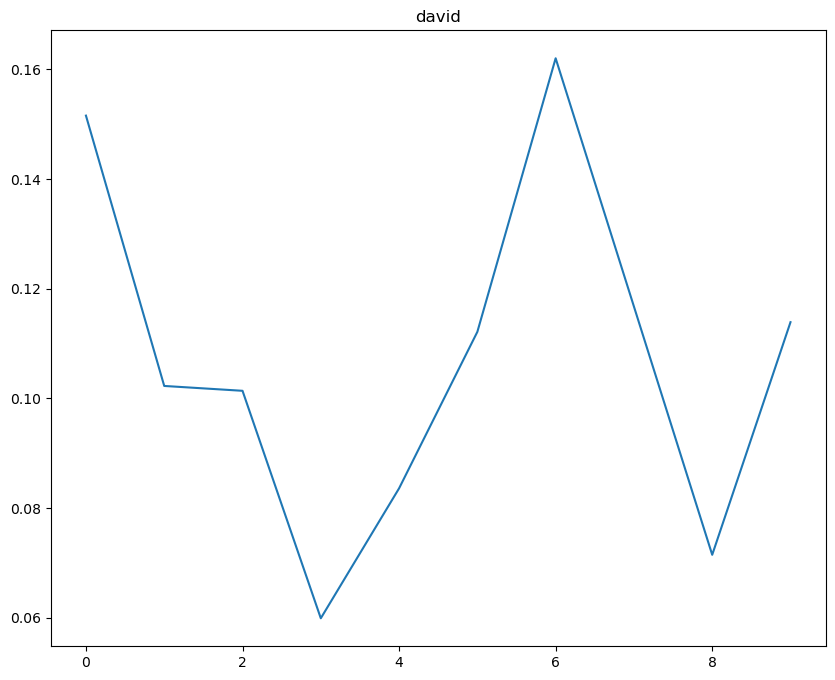

In [11]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

### plot represents the polarity scores of the first comedian's routine over time. 
- Each point on the plot corresponds to a time step in the routine
- polarity score at that time step determines the position of the point on the y-axis. 

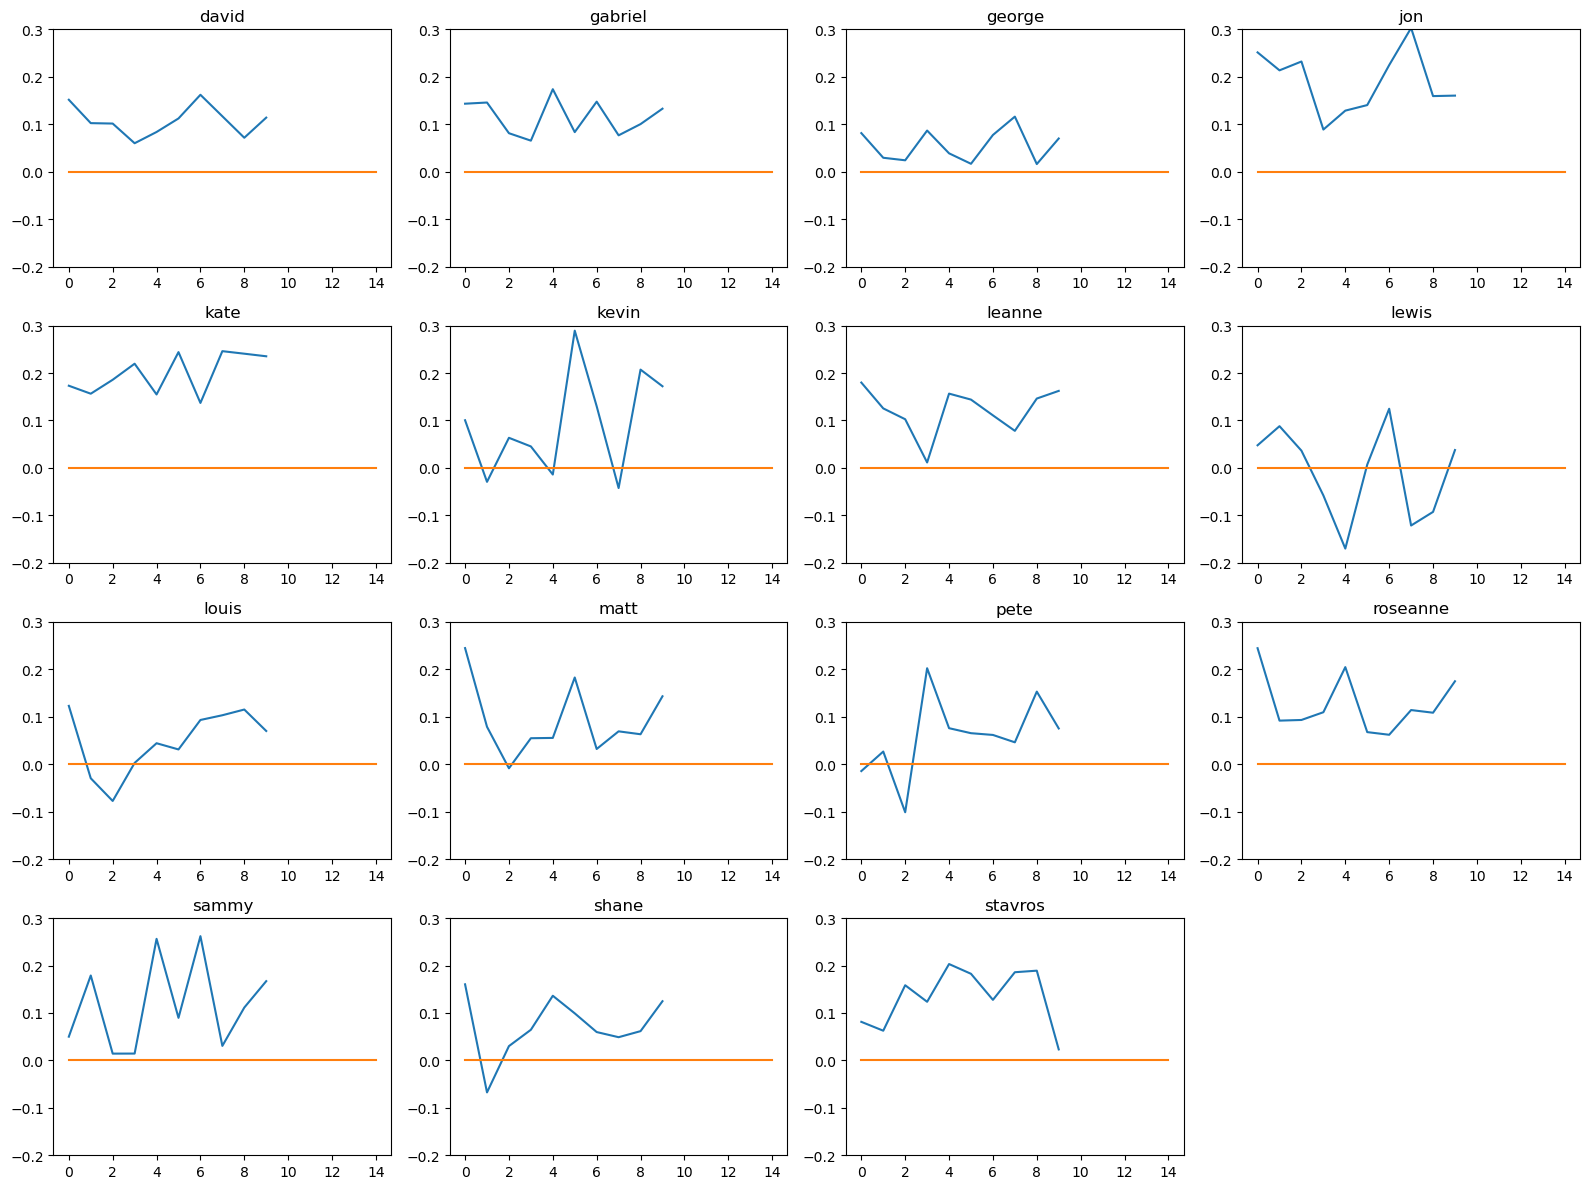

In [14]:
plt.rcParams['figure.figsize'] = [16, 12]

num_comedians = len(data.index)
num_rows = (num_comedians - 1) // 4 + 1

for index, comedian in enumerate(data.index):    
    plt.subplot(num_rows, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0, 15), np.zeros(15))
    plt.title(comedian)  # Assuming the index itself is the comedian's name
    plt.ylim(bottom=-0.2, top=0.3)

plt.tight_layout()  # Adjust subplot parameters to give specified padding.
plt.show()


Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbiglia.

On the other hand, you have some pretty different patterns here like Bo Burnham who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine.

## Additional Exercises

1. Modify the number of sections the comedy routine is split into and see how the charts over time change.

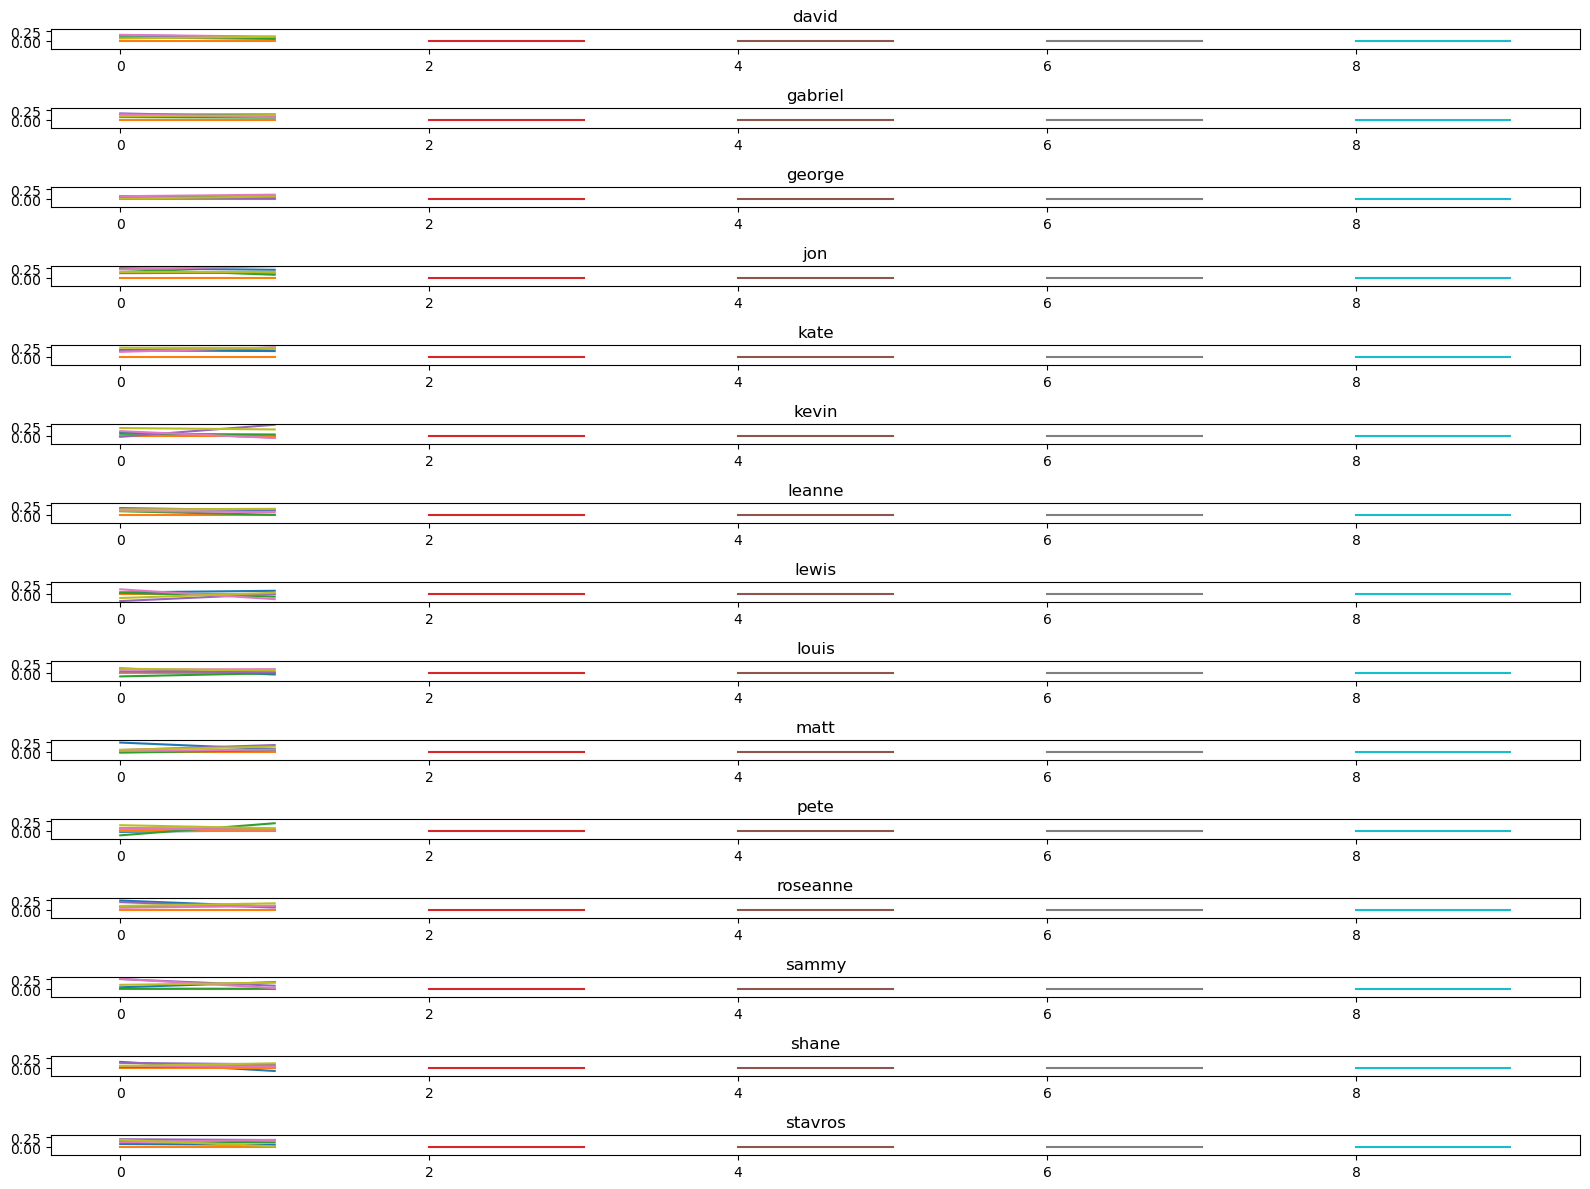

In [15]:
plt.rcParams['figure.figsize'] = [16, 12]

num_comedians = len(data.index)
num_sections = 5  # You can change this to any desired number of sections

for index, comedian in enumerate(data.index):    
    plt.subplot(num_comedians, 1, index+1)
    for i in range(num_sections):
        section_length = len(polarity_transcript[index]) // num_sections
        start_idx = i * section_length
        end_idx = (i + 1) * section_length if i < num_sections - 1 else len(polarity_transcript[index])
        plt.plot(polarity_transcript[index][start_idx:end_idx])
        plt.plot(np.arange(start_idx, end_idx), np.zeros(end_idx - start_idx))
    plt.title(comedian)
    plt.ylim(bottom=-0.2, top=0.3)

plt.tight_layout()
plt.show()

The resulting plot represents the polarity scores of each comedian's routine divided into multiple sections. Each subplot displays how the sentiment of the routine varies within different segments, allowing for a more detailed analysis of sentiment dynamics over time.

# Heatmap of Polarity Scores: 

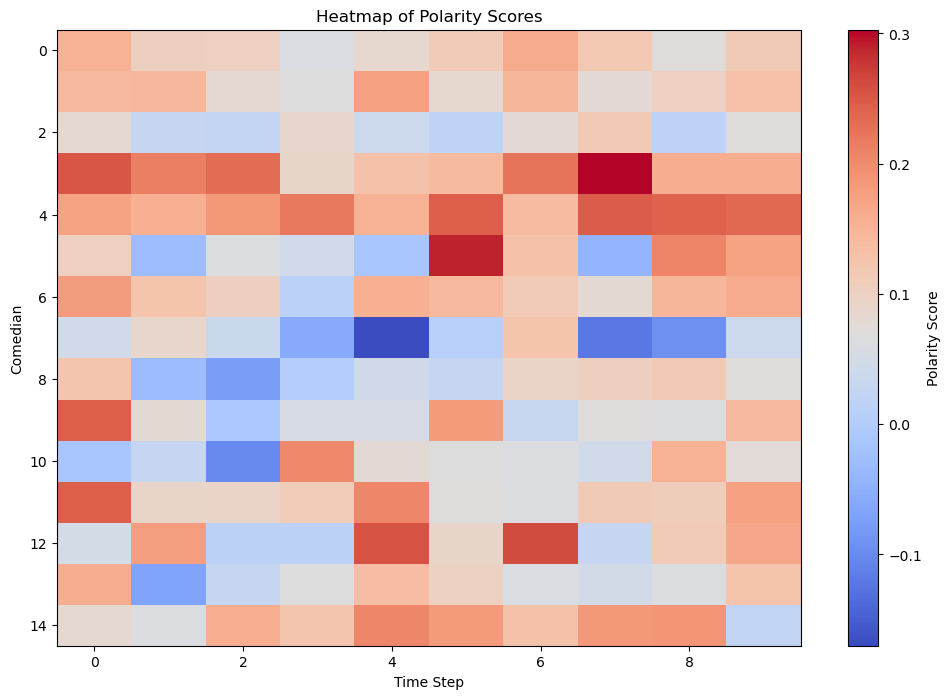

In [17]:
num_comedians = len(data.index)
max_length = max(len(transcript) for transcript in polarity_transcript)
heatmap_data = np.zeros((num_comedians, max_length))

for i, transcript in enumerate(polarity_transcript):
    heatmap_data[i, :len(transcript)] = transcript

# Plot the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Polarity Score')
plt.xlabel('Time Step')
plt.ylabel('Comedian')
plt.title('Heatmap of Polarity Scores')
plt.show()

- Each row of the heatmap represents a comedian.
- Each column represents a time step in the comedian's routine.
- The color of each cell in the heatmap represents the polarity score of the comedian at a particular time step:
- Positive polarity scores are represented by warmer colors (e.g., shades of red).
- Negative polarity scores are represented by cooler colors (e.g., shades of blue).
- Neutral polarity scores are represented by intermediate colors (e.g., white or shades of gray).